# Long-term rainfall

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [21]:
import ocha_stratus as stratus
import matplotlib.pyplot as plt
import pandas as pd

from src.datasources import imerg

In [10]:
df_imerg = imerg.load_imerg(pcode="CU")

In [12]:
df_imerg = df_imerg.sort_values("valid_date")

In [32]:
windows = [15, 30, 60, 90, 120]

for window in windows:
    df_imerg[f"roll{window}"] = df_imerg["mean"].rolling(window).sum()

In [33]:
df_imerg["year"] = df_imerg["valid_date"].dt.year
df_imerg["doy"] = df_imerg["valid_date"].dt.dayofyear
df_imerg["plot_date"] = pd.to_datetime(df_imerg["doy"], format="%j")

In [34]:
df_imerg

,iso3,pcode,valid_date,adm_level,mean,median,min,max,count,sum,std,roll15,roll30,roll60,roll90,year,doy,plot_date,roll120
212,CUB,CU,2000-06-01,0,13.905612,12.470000,0.0,74.935000,3791,52716.170,11.581696,NaN,NaN,NaN,NaN,2000,153,1900-06-02,NaN
213,CUB,CU,2000-06-02,0,4.885277,2.480000,0.0,58.075000,3791,18520.084,6.386488,NaN,NaN,NaN,NaN,2000,154,1900-06-03,NaN
214,CUB,CU,2000-06-03,0,5.822504,3.780000,0.0,45.140000,3791,22073.115,6.334307,NaN,NaN,NaN,NaN,2000,155,1900-06-04,NaN
0,CUB,CU,2000-06-04,0,6.914716,3.870000,0.0,59.784996,3791,26213.690,7.977752,NaN,NaN,NaN,NaN,2000,156,1900-06-05,NaN
1,CUB,CU,2000-06-05,0,10.971368,6.254999,0.0,95.700000,3791,41592.453,12.472013,NaN,NaN,NaN,NaN,2000,157,1900-06-06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9113,CUB,CU,2025-05-15,0,5.159136,1.165000,0.0,85.070000,3791,19558.285,8.528913,69.448647,97.481945,140.097472,165.009068,2025,135,1900-05-15,167.967595
9033,CUB,CU,2025-05-16,0,1.104215,0.000000,0.0,24.340000,3791,4186.080,3.276133,69.979511,87.806962,140.298118,166.068261,2025,136,1900-05-16,168.995625
9034,CUB,CU,2025-05-17,0,0.394116,0.000000,0.0,25.134998,3791,1494.095,1.935978,67.498408,88.126888,140.550711,166.391928,2025,137,1900-05-17,168.695424
9114,CUB,CU,2025-05-18,0,0.089387,0.000000,0.0,12.184999,3791,338.865,0.682431,60.110395,88.193081,140.640098,166.299490,2025,138,1900-05-18,168.756518


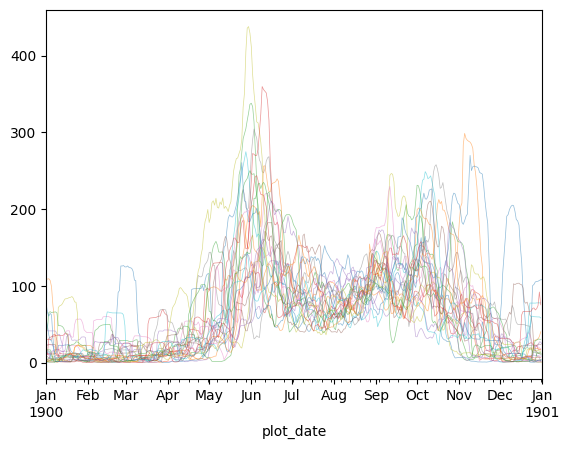

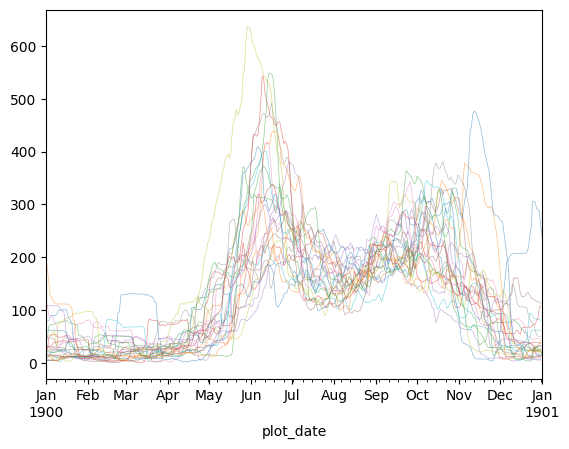

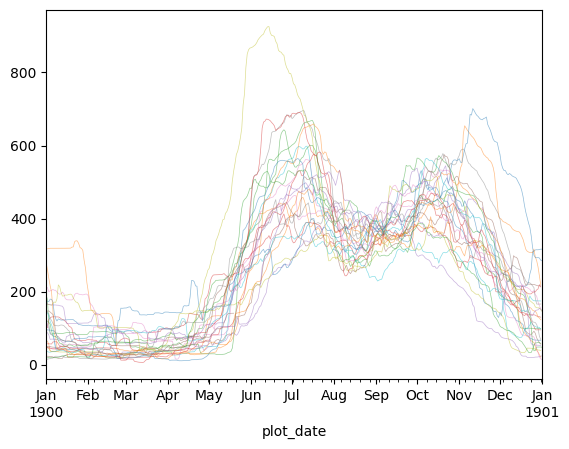

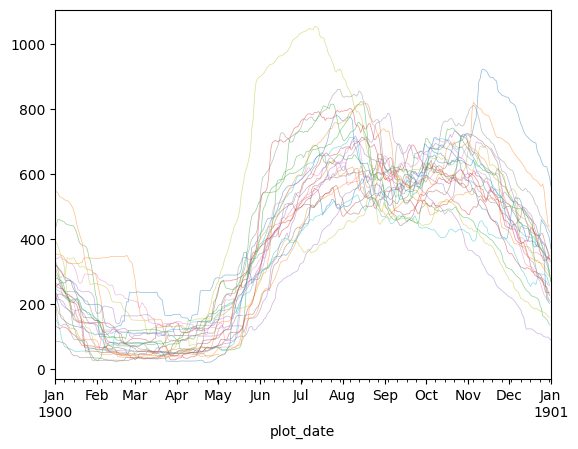

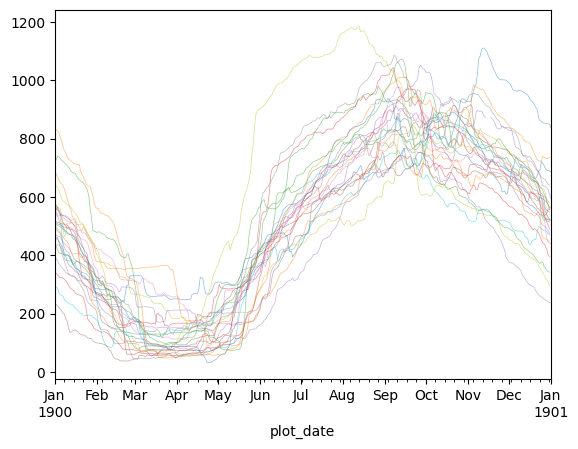

In [35]:
for window in windows:
    fig, ax = plt.subplots()
    df_plot = df_imerg.pivot(
        index="plot_date", columns="year", values=f"roll{window}"
    )
    df_plot.plot(ax=ax, alpha=0.5, linewidth=0.5)
    ax.get_legend().remove()